# Worked Example #2
Consider the lightweight steel frame structure shown below. It supports heavy machinery with a total mass of $m = 10,000\: kg$. We can neglect the weight of the steel frame. Based on an experimental impact test, the inherent structural damping has been estimated to be 2% ($\xi=0.02$).

A load test has shown that a lateral force of $P=1500\: N$ induces a lateral displacement of $\Delta = 7 \:mm$.

The steel frame is constrained such that it can only move laterally (i.e. there is no twisting or significant vertical movement). As such it can be modelled as a SDoF system as shown on the right. 

![title](img/image_1.png)

With this information, determine the following:
<ol>
    <li>The undamped natural frequency</li>
    <li>The damping coefficient</li>
    <li>The logarithmic decrement</li>
    <li>The damped angular natural frequency</li>
    <li>The number of cycles for the amplitude to reduce to 0.001 m</li>
    <li>Plot the free vibration response, assuming the structure was released from its initial displacement of 7 mm</li>
</ol>     

# Solution

In [1]:
# Dependencies
import math #Basic math library
import numpy as np #Numpy -> tools for working with arrays
import matplotlib.pyplot as plt #Matplotlib -> tools for plotting

# Constants
m = 10000 # (kg) Mass
xi = 0.02 # Damping ratio
P = 1500 # (N) Static force magnitude
Delta = 7 # (mm) Static displacement

### 1. Undamped natural frequency, $\omega_n$ & $f_n$

In [2]:
# Undamped natural frequency
k = P/(Delta/1000) #(N/m) Stiffness
omega_n = round(math.sqrt(k/m),3) #(rads/sec) Angular natural frequency
fn = round(omega_n/(2*math.pi),3) # (Hz) Natural frequency
T = round(1/fn,2) # (sec) Period of oscillation

### 2. Damping coefficient , $c$

In [3]:
c = round(xi*2*m*omega_n,2) #(Ns/m) Damping coefficient

### 3. Logarithmic decrement, $\delta$

In [4]:
delta = round(2*math.pi*xi,3) # Logarithmic decrement

### 4. Damped angular natural frequency, $\omega_d$

In [5]:
omega_d = round(omega_n*math.sqrt(1-(xi**2)),3) #(rads/sec) Damped angular natural frequency

### Output so far:

In [6]:
# Output
print("1.0 The angular natural frequency is {one} radians per second or {two} Hz with a period of {three} seconds".format(one=omega_n, two=fn, three=T))
print("2.0 The damping coefficient is {one} Ns/m".format(one=c))
print("3.0 The logarithmic decrement is {one}".format(one=delta))
print("4.0 The damped angular natural frequency is {one} radians per second".format(one=omega_d))

1.0 The angular natural frequency is 4.629 radians per second or 0.737 Hz with a period of 1.36 seconds
2.0 The damping coefficient is 1851.6 Ns/m
3.0 The logarithmic decrement is 0.126
4.0 The damped angular natural frequency is 4.628 radians per second


### 5. Number of oscillations before amplitude reduces to $0.001$ m

In [7]:
u_start = 0.007
u_finish = 0.001
n = math.log(u_start/u_finish)/delta
n_full = math.ceil(n)
t_full = T*n_full

print("5.0 It takes {one} complete cycles and {two} seconds for the oscillation amplitude to reduce to {three} mm".format(one=n_full, two=t_full, three=u_finish))

5.0 It takes 16 complete cycles and 21.76 seconds for the oscillation amplitude to reduce to 0.001 mm


### 6. Free vibration response

#### Free vibration response

\begin{equation}
u(t) = e^{-\xi\omega_n t}[A \sin(\omega_d t) + B\cos(\omega_d t) ]
\end{equation}

#### Initial conditions

\begin{align}
u(t=0) &= 0.007 \:\text{m}\\
\dot{u}(t=0) &= 0 \:\text{m/s}
\end{align}

Need to differentiate $u(t)$ to get expression for $\dot{u}(t)$...

\begin{equation}
\dot{u}(t) = A\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt}\right] + B\left[-e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt} \right]
\end{equation}

Sub initial conditions into equations for $u(t)$ and $\dot{u}(t)$ to determine A and B

\begin{align}
A &= 0.00014\\
B &= 0.007
\end{align}

Therefore the free vibration response is given by,

\begin{equation}
u(t) = e^{-\xi\omega_n t}[0.00014\: \sin(\omega_d t) + 0.007\:\cos(\omega_d t)]
\end{equation}

#### Plot the response

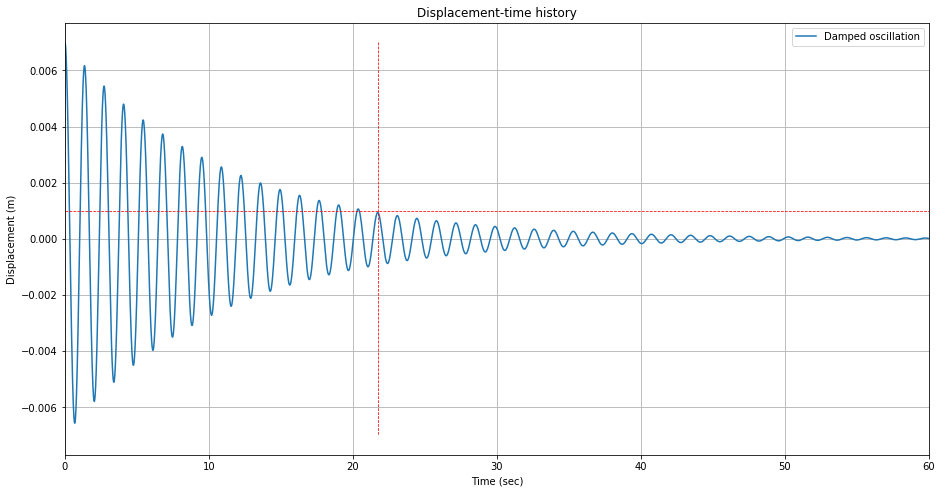

In [8]:
tmax = 60 #(sec) The max time
delta_t = 0.01 #(sec) The timestep
nPoints = tmax/delta_t #Number of equally spaced data points
t = np.linspace(0,tmax, int(nPoints)) # Time vector
u = math.e**(-xi*omega_n*t)*(0.00014*np.sin(omega_d*t) + 0.007 *np.cos(omega_d*t)) #The damped oscillation

#Plotting
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,1.5]) 
axes.plot(t,u,label='Damped oscillation')
axes.plot([0, tmax],[u_finish,u_finish],'r--',lw=0.75)
axes.plot([t_full, t_full],[u_start,-u_start],'r--',lw=0.75)
axes.set_xlim([0,tmax])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Displacement-time history')
axes.grid()
axes.legend()
plt.show()